In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
N, D, H = 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(H, input_shape=(D,),activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(D))
y_pred=model(x)

loss=tf.losses.mean_squared_error(y_pred,y)

optimizer=tf.train.GradientDescentOptimizer(1e-5)
Update=optimizer.minimize(loss)


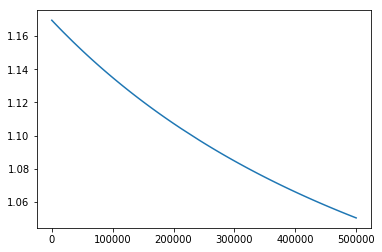

[1.1695467, None] [1.050295, None]


In [3]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D),}
    
    loss_summery=[]
    steps=500000
    for t in range(steps):
        out = sess.run([loss,Update],feed_dict=values)
        loss_val = out
        loss_summery.append(loss_val)
    plt.plot(range(steps), loss_summery)
    plt.show()
    print(loss_summery[0],loss_summery[steps-1])
